In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c:\users\mitesh manoj adake\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\mitesh manoj adake\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\mitesh manoj adake\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [7]:
data = pd.read_csv("D:/Sem - 7 Lab/LP-3/ML/3/Churn_Modelling.csv", index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
X_columns = df.columns.tolist()[2:12]
y_columns = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print(f'X values: {X_columns}')
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
y values: ['Exited']


In [10]:
X = df[X_columns].values 
y = df[y_columns].values 

In [11]:
print("Original:", X[:8,1])
from sklearn.preprocessing import LabelEncoder

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print("Encoded: " ,X[:8,1])

Original: ['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany']
Encoded:  [0 2 0 0 2 2 0 1]


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [13]:
X = pipeline.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [15]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()

Using TensorFlow backend.


In [17]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [18]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

In [19]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [20]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [21]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [22]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
 - 1s - loss: 0.7187 - accuracy: 0.5525 - val_loss: 0.5878 - val_accuracy: 0.7962
Epoch 2/200
 - 0s - loss: 0.5326 - accuracy: 0.7943 - val_loss: 0.4908 - val_accuracy: 0.7950
Epoch 3/200
 - 0s - loss: 0.4811 - accuracy: 0.7965 - val_loss: 0.4541 - val_accuracy: 0.7962
Epoch 4/200
 - 0s - loss: 0.4575 - accuracy: 0.8058 - val_loss: 0.4291 - val_accuracy: 0.8138
Epoch 5/200
 - 0s - loss: 0.4469 - accuracy: 0.8082 - val_loss: 0.4167 - val_accuracy: 0.8250
Epoch 6/200
 - 0s - loss: 0.4304 - accuracy: 0.8142 - val_loss: 0.4055 - val_accuracy: 0.8263
Epoch 7/200
 - 0s - loss: 0.4321 - accuracy: 0.8139 - val_loss: 0.4010 - val_accuracy: 0.8288
Epoch 8/200
 - 0s - loss: 0.4288 - accuracy: 0.8124 - val_loss: 0.3957 - val_accuracy: 0.8313
Epoch 9/200
 - 0s - loss: 0.4202 - accuracy: 0.8144 - val_loss: 0.3901 - val_accuracy: 0.8325
Epoch 10/200
 - 0s - loss: 0.4198 - accuracy: 0.8168 - val_loss: 0.3873 - val_accuracy: 0.8338
Epoch 11/200

Epoch 87/200
 - 0s - loss: 0.3814 - accuracy: 0.8451 - val_loss: 0.3429 - val_accuracy: 0.8687
Epoch 88/200
 - 0s - loss: 0.3833 - accuracy: 0.8472 - val_loss: 0.3441 - val_accuracy: 0.8687
Epoch 89/200
 - 0s - loss: 0.3826 - accuracy: 0.8446 - val_loss: 0.3434 - val_accuracy: 0.8675
Epoch 90/200
 - 0s - loss: 0.3830 - accuracy: 0.8451 - val_loss: 0.3437 - val_accuracy: 0.8687
Epoch 91/200
 - 0s - loss: 0.3833 - accuracy: 0.8482 - val_loss: 0.3437 - val_accuracy: 0.8687
Epoch 92/200
 - 0s - loss: 0.3848 - accuracy: 0.8424 - val_loss: 0.3454 - val_accuracy: 0.8662
Epoch 93/200
 - 0s - loss: 0.3801 - accuracy: 0.8451 - val_loss: 0.3441 - val_accuracy: 0.8687
Epoch 94/200
 - 0s - loss: 0.3805 - accuracy: 0.8440 - val_loss: 0.3452 - val_accuracy: 0.8637
Epoch 95/200
 - 0s - loss: 0.3850 - accuracy: 0.8468 - val_loss: 0.3447 - val_accuracy: 0.8662
Epoch 96/200
 - 0s - loss: 0.3852 - accuracy: 0.8443 - val_loss: 0.3456 - val_accuracy: 0.8650
Epoch 97/200
 - 0s - loss: 0.3822 - accuracy: 0.84

Epoch 173/200
 - 0s - loss: 0.3771 - accuracy: 0.8521 - val_loss: 0.3328 - val_accuracy: 0.8637
Epoch 174/200
 - 0s - loss: 0.3762 - accuracy: 0.8519 - val_loss: 0.3326 - val_accuracy: 0.8637
Epoch 175/200
 - 0s - loss: 0.3735 - accuracy: 0.8579 - val_loss: 0.3324 - val_accuracy: 0.8625
Epoch 176/200
 - 0s - loss: 0.3700 - accuracy: 0.8521 - val_loss: 0.3315 - val_accuracy: 0.8637
Epoch 177/200
 - 0s - loss: 0.3734 - accuracy: 0.8540 - val_loss: 0.3343 - val_accuracy: 0.8600
Epoch 178/200
 - 0s - loss: 0.3718 - accuracy: 0.8553 - val_loss: 0.3329 - val_accuracy: 0.8612
Epoch 179/200
 - 0s - loss: 0.3776 - accuracy: 0.8526 - val_loss: 0.3332 - val_accuracy: 0.8662
Epoch 180/200
 - 0s - loss: 0.3768 - accuracy: 0.8499 - val_loss: 0.3326 - val_accuracy: 0.8625
Epoch 181/200
 - 0s - loss: 0.3744 - accuracy: 0.8537 - val_loss: 0.3319 - val_accuracy: 0.8650
Epoch 182/200
 - 0s - loss: 0.3743 - accuracy: 0.8549 - val_loss: 0.3317 - val_accuracy: 0.8650
Epoch 183/200
 - 0s - loss: 0.3720 - acc

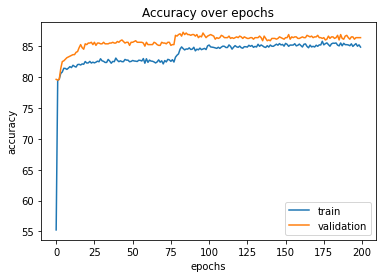

In [24]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [25]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.23424631]
 [0.34072602]
 [0.23257485]
 [0.05654895]
 [0.10536355]]


In [26]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1529,   66],
       [ 215,  190]], dtype=int64)

In [28]:
print(((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

85.95 % of testing data was classified correctly
